# Intermediate Machine Learning: Assignment 1

**Deadline**

Assignment 1 is due Wednesday, February 23 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Lasso
 * Bias-variance decomposition
 * Mercer kernels
 * Convolutional neural networks

This assignment will also help to solidify your Python and Jupyter notebook skills.


## Problem 1: A goat rodeo with the lasso (15 points)

In this problem, you will use the lasso 
to round up some predictor variables. (The term [goat rodeo](https://en.wikipedia.org/wiki/The_Goat_Rodeo_Sessions) refers to "a chaotic event where many things must go right for the situation to work." With careful use of the lasso and least squares regression, you can avoid chaos.)

We have prepared a data set with $y = X\beta + \sigma \epsilon$ where $\beta$ is a sparse vector and $\epsilon_i \sim N(0,1)$ is Gaussian noise. Your task is three-fold:

* Generate a plot of the lasso regularization paths;
* Determine which coefficients of $\beta$ are nonzero;
* Give your best estimate of these nonzero coefficients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
%matplotlib inline

Just run the next cell to read in the data.

In [2]:
X, y = pd.read_pickle('https://raw.githubusercontent.com/YData123/sds365-sp22/main/assignments/assn1/problem1_Xy.pkl')
n, p = X.shape
print("Number of rows: {}".format(n))
print("Number of columns: {}".format(p))

Number of rows: 100
Number of columns: 50


### 1.1: Lasso regularization paths

Run the lasso and plot the regularization paths. You can use the `Lasso` class from the `sklearn.linear_model` package. Plot the parameter paths with the regularization level $\lambda$ (`alpha` in the code) on the log-scale, as done in the lasso demo code from class. (As always, be sure to label your axes.)



In [9]:
# your code here

### 1.2: Select, estimate, and predict 

The true model is linear, and only a subset $S \subset \{0,1,\ldots, 49\}$ of the 50 variables have non-zero coefficients $\beta_j$. In this problem you should make three estimates: 

1. An estimate $\hat S$ of $S$
2. An estimate $\hat \beta_j$ for each $j\in \hat S$
3. An estimate of the predictive risk ${\mathbb E}(Y - X\hat\beta)$


We are not specifying how you should construct these estimates. You should use your judgement, taste, and 
the tools provided from class. However, you must clearly explain and justify whatever approach that you use.


In [2]:
# your code (and Markdown if needed) here

## Problem 2: Risky business (10 points)

In class [(and in these notes)](https://github.com/YData123/sds365-sp22/raw/main/notes/kernel-bias-variance.pdf) we sketched a proof that, when the regression function has two bounded derivatives,
 the bias and variance for kernel smoothing scale as

$$ \mbox{bias}^2 = O\left(h^4\right)$$
$$ \mbox{var} = O\left(\frac{1}{nh^p}\right).$$

Here $h$ is the bandwidth parameter, $n$ is the sample size, and $p$ is the number of predictor variables. These expressions are asymptotic, meaning that they apply as $n$ gets large and $h$ gets small.  In this problem your job is to reason about the implications of this bias-variance decomposition for prediction.

*Note:* For this problem, you may either enter your answers in Markdown using $\rm\LaTeX$, or you write them on paper and scan to insert as an image in the notebook; whichever you prefer.


### 2.1 Selecting the optimal bandwidth

Suppose that the bias and variance are such that 

$$ \mbox{bias}^2(\hat m(x))  \leq c_1 h^4 $$
$$ \mbox{var}(\hat m(x)) \leq c_2 \frac{1}{nh^p}.$$

for two constants $c_1$ and $c_2$. Using these expressions and a little calculus, determine the optimal bandwidth $h$ to minimize the risk function 

$$R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2.$$

Your answer should involve the constants $c_1, c_2$, and $n$ and $p$. Give a bound on the resulting risk using this bandwidth.


### 2.2 Bandwith selection without tears

Now, going back to the expressions $\mbox{bias}^2 = O\left(h^4\right)$ and $ \mbox{var} = O\left(\displaystyle\frac{1}{nh^p}\right)$, explain why the scaling of the optimal bandwidth (as a function of $n$ and $p$), must satisfy 
$\mbox{bias}^2  \approx \mbox{var}$; that is, they must be of the same order as $h\to 0$. Then, without using any calculus, use this argument to determine the optimal scaling of the bandwidth and the fastest rate at which the 
risk $R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2$ can approach zero as the sample size increases.


### 2.3 The cursed COD

Using the risk bound you derive above, make a plot that demonstrates the curse of dimensionality by plotting the sample size required to achieve a given level of risk. Specifically, let the target risk $R$ vary between 0.1 and 0.5, and let the dimension $p$ vary between 1 and 20, and plot the sample size required to achieve that risk. Give a single plot that shows the collection of curves for each dimension.




In [4]:
# your code and markdown with derivations here

## Problem 3: A kernel of truth (15 points)

For problem you will implement nonparametric regression using Mercer kernels and penalization, in 1-dimension. This can be compared to regression using smoothing kernels. 

As discussed in lecture, nonparametric regression with Mercer kernels is based on the infinite dimensional ridge regression

$$ \hat m = \mbox{argmin} \| Y - m \|^2 + \lambda \|m\|_K^2$$

By the representer theorem, this is equivalent to setting $\hat m(x) = \sum_{i=1}^n \hat \alpha_i K(X_i, x)$ and 
using the finite dimensional optimization

$$ \hat \alpha = \mbox{argmin} \| Y - {\mathbb K} \alpha \|^2 + \lambda \alpha^T {\mathbb K} \alpha$$

###  3.1 Solve 

Derive a closed-form expression for the minimizer $\hat\alpha$. Show all of the steps in your derivation, 
and justify each step. (As above, you may either enter your answers in Markdown using $\rm\LaTeX$, or insert an image of your handwritten solution.)


###  3.2 Implement

Next you will use your solution above and implement Mercer kernel regression. We give some starter code.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep

The following cell defines some "helper functions" for this exercise. You don't need to change any of this code.
(If you do want to make changes, just describe what you did and why.)

In [7]:
def plot_estimate(x, f, fhat, X, y, sigma, lmbda, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='red', linewidth=2, label='true function')
    plt.plot(x, fhat, color='blue', linewidth=2, label='estimated function')
    plt.scatter(X, y, color='black', alpha=.5, label='random sample')
    plt.ylim(np.min(f)-4*sigma, np.max(f)+4*sigma)
    plt.legend(loc='upper left')
    plt.title('lambda: %.3g' % lmbda)
    plt.xlabel('x')
    plt.ylabel('estimated m(x)')
    plt.show()
    sleep(sleeptime)
    
def true_fn(x):
    return 3*x**2

def run_simulation(kernel, lmbdas, show_bias_variance=True):
    min_x, max_x = -1, 1
    x = np.linspace(min_x, max_x, 100)
    f = true_fn(x)
    sigma = .25
    estimates = []
    trials = 500

    for lmbda in lmbdas:
        estimates_lambda = []
        for i in np.arange(trials):
            X = np.sort(np.random.uniform(low=min_x, high=max_x, size=50))
            fX = true_fn(X)
            y = fX + sigma*np.random.normal(size=len(X))
            fhat = mercer_kernel_regress(kernel, X, y, x, lmbda=lmbda)
            if i % 50 == 0:
                plot_estimate(x, f, fhat, X, y, sigma, lmbda)
            estimates_lambda.append(fhat)
        estimates.append(estimates_lambda)

    if show_bias_variance == False:
        return
    
    fhat = np.array(estimates)
    sq_bias = np.zeros(len(lmbdas))
    variance = np.zeros(len(lmbdas))

    for i in np.arange(len(lmbdas)):
        sq_bias[i] = np.mean((np.mean(fhat[i], axis=0) - f)**2)
        variance[i] = np.mean(np.var(fhat[i], axis=0))
    
    plt.figure(figsize=(10,6))
    plt.plot(lmbdas, sq_bias, label='squared bias', linewidth=2)
    plt.plot(lmbdas, variance, label='variance', linewidth=2)
    plt.plot(lmbdas, sq_bias + variance, label='risk')
    plt.legend()
    plt.show()
 

Your job is to implement Mercer kernel regression and run it on two 
different kernel functions. The two kernels could simply be the Gaussian kernel
with two different bandwidths, or you might experiment with other kernels.

The function `mercer_kernel_regress` takes a kernel, training data `X` and `y`, an array of values `x` to evaluate the function on, and a regularization parameter. You'll use your derivation above to 
determine the coefficients $\alpha$. For some clues and suggestions on how to do the 
implementation, see our demo code for smoothing kernels. You need to do something very similar.


In [8]:
def mercer_kernel_regress(kernel, X, y, x, lmbda):  
    # your implementation here
    _

def kernel1(x,y):
    # your implementation here
    _
    
def kernel2(x,y):
    # your implementation here
    _

###  3.3 Run two simulations and select regularization parameters

Finally, using our starter code and your own implementation above, run two simulations, one 
using `kernel1` and the other using `kernel2`. After each simulation, select a regularization level from the bias-variance tradeoff, and then run a final simulation with that regularization level. In the following 
starter code, you only need to specify the sequence of regularization parameters.


In [ ]:
lmbdas = # define your sequence of lambdas
run_simulation(kernel1, lmbdas) 

In [ ]:
lambda_hat = # set the optimal lambda
run_simulation(kernel1, [lambda_hat], show_bias_variance=False)

In [ ]:
lmbdas = # define your sequence of lambdas
run_simulation(kernel2, lmbdas)

In [ ]:
lambda_hat = # set the optimal lambda
run_simulation(kernel2, [lambda_hat], show_bias_variance=False)

## Problem 4: Brain food (20 points)

This problem gives you some experience with convolutional neural networks for image classification using [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow).  

The classification task is to discriminate real optical images of brain activity in mice from 
fake images that were constructed using a [generative adversarial network (GAN)](https://en.wikipedia.org/wiki/Generative_adversarial_network).
A paper on the underlying imaging technologies developed by Yale researchers is [here](https://www.nature.com/articles/s41592-020-00984-6).

For this problem we'll walk you through the following steps:
* Downloading the data
* Loading the data
* Displaying some sample images
* Building a classification model using a simple CNN

After this, your task will be to improve upon this baseline model by building, training, and evaluating two more CNNs. 



###  Downloading the data

The data are contained in a group of compressed files on AWS. There are 10 files of real images, 
and 10 files of fake images; each file is roughly 100 MB in size; so the entire dataset is about 2 GB.
You should download the data to the computer you are running on, and place the in a folder named "data".

*Important note:* If you do not have enough space to download all of the data, just download what you can;
there will be no penalty for running on less data. If you want assistance running in Google Colab, please let us know.
You'll need to download segments 7,8,9 (real and fake) for testing, and at least one other segment for training.

Here are URLs to access the 20 data files:


https://sds365.s3.amazonaws.com/calcium/real_0.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_1.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_2.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_3.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_4.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_5.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_6.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_7.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_8.gz <br>
https://sds365.s3.amazonaws.com/calcium/real_9.gz <br>


https://sds365.s3.amazonaws.com/calcium/fake_0.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_1.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_2.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_3.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_4.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_5.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_6.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_7.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_8.gz <br>
https://sds365.s3.amazonaws.com/calcium/fake_9.gz <br>




We import some Python packages from TensorFlow and Keras.

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [14]:
tf.__version__

'2.4.0'

Some helper functions for reading the data and plotting images.

In [15]:
def plot_images(imgs, title):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(imgs[i], cmap='rainbow')
        plt.axis('off')
    plt.suptitle(title)
    
def read_gz(filedir, shape=[-1,128,128]):
    print('reading %s' % filedir)
    with gzip.open(filedir, 'rb') as f:
        content = f.read()
    imgs = np.frombuffer(content, dtype='float32').reshape(shape)
    return imgs

def load_data(pieces):
    data = []
    label = []
    print('Loading data:\n-------------')
    for i in pieces:
        real_img = read_gz('data/real_{:d}.gz'.format(i), shape=[-1,128,128, 1])
        fake_img = read_gz('data/fake_{:d}.gz'.format(i), shape=[-1,128,128, 1])
        real_label = np.zeros((real_img.shape[0],1))
        fake_label = np.zeros((fake_img.shape[0],1))
        real_label[:,0] = 0
        fake_label[:,0] = 1
        data.append(real_img)
        data.append(fake_img)
        label.append(real_label)
        label.append(fake_label)
    print()
    data_all = np.concatenate(data, axis=0)
    label_all = np.concatenate(label, axis=0)
    return data_all, label_all
    


### Loading the data 

Let's look at some images. 

In [16]:
real_images = read_gz('data/real_0.gz')
fake_images = read_gz('data/fake_0.gz')

# real_img are original data, fake_img are synthetic data generated using a GAN model


reading data/real_0.gz
reading data/fake_0.gz


Each of the images is 128x128 pixels, and there are 2048 images in each file:

In [17]:
real_images.shape, fake_images.shape

((2048, 128, 128), (2048, 128, 128))

### Displaying some sample images

Now we'll display some real and fake images. Can you spot any differences between the two. Do you think that you could learn to tell them apart? Please comment below.

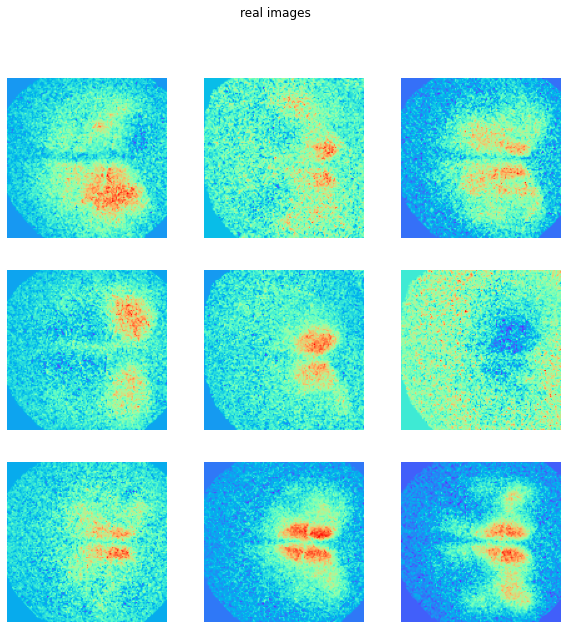

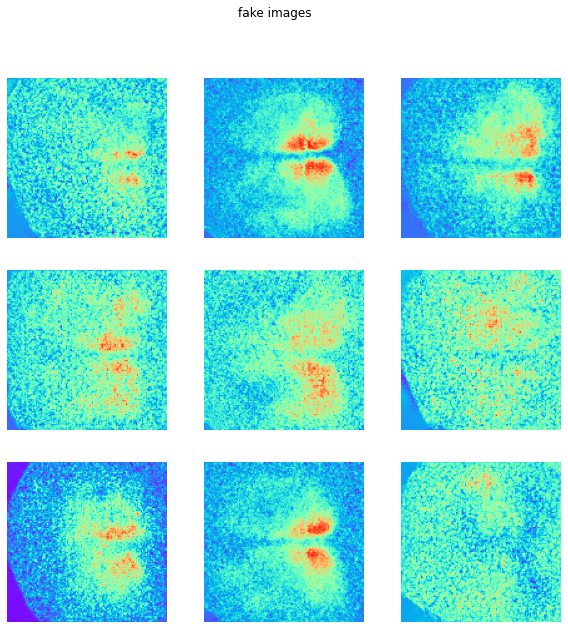

In [18]:
plot_images(real_images, 'real images')
plot_images(fake_images, 'fake images')

[your markdown here]

### 4.1 Building a baseline model

The code below trains and evaluates a baseline model. The model is trained on six of the data files (3 real, and 3 fake, about 12,000 images total) and is tested on six of the data files. 
We begin by loading in the data.


In [19]:
train_images, train_labels = load_data([0,1,2])
test_images, test_labels = load_data([7,8,9])

Loading data:
-------------
reading data/real_0.gz
reading data/fake_0.gz
reading data/real_1.gz
reading data/fake_1.gz
reading data/real_2.gz
reading data/fake_2.gz

Loading data:
-------------
reading data/real_7.gz
reading data/fake_7.gz
reading data/real_8.gz
reading data/fake_8.gz
reading data/real_9.gz
reading data/fake_9.gz



Next, we initialize our convolutional neural network. This particular network has four layers: A convolutional layer, a max pooling latter, a flattened layer, and a dense layer with two terminal neurons and no activation function. The total number of parameters in this network is 62,338.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 61506     
Total params: 62,338
Trainable params: 62,338
Non-trainable params: 0
_________________________________________________________________


Next, we train the model. Here we just train for two "epochs", where each epoch scans through the 
data in random order, processing a batch of images in each stochastic gradient descent step.


In [21]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=2, validation_split=0.2, shuffle=True)

Epoch 1/2
308/308 [==============================] - 33s 105ms/step - loss: 0.3742 - accuracy: 0.8418 - val_loss: 0.0417 - val_accuracy: 0.9943
Epoch 2/2
308/308 [==============================] - 31s 101ms/step - loss: 0.0190 - accuracy: 0.9990 - val_loss: 0.0129 - val_accuracy: 1.0000


Finally, we evaluate the model on the test data (the last three segments of images: 7,8,9). Your accuracy may vary for this identical configuration due to the randomness in SGD.

In [22]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('test accuracy: {:.4f}'.format(test_acc))

384/384 - 8s - loss: 0.2191 - accuracy: 0.8670
test accuracy: 0.8670


### 4.2 and 4.3: Improving upon the baseline

Your job is to improve upon this baseline model. _You should always test on the same segments 7,8,9 as above._ You can extend this model in various ways:

* Train on more data (but always test on the same test set)
* Add more convolutional layers 
* Add more dense layers, using an activation function
* Regularize using a dropout layer
* Use a different mini-batch size

For each model that you decide to train, describe how and why you built this model. For example, you can:

* Give a diagram showing the sequence of layers used;
* Explain your rationale for using each of the layers;
* Comment on the number of parameters used by the model, and which layers have the most parameters;
* Describe your findings on number of epochs and training data size;
* Comment on models you experimented with but did not include;
* Describe the increase or decrease in accuracy that resulted.

When we evaluate your notebook, we will look for (1) significant improvements in test accuracy (2) descriptions of your models that show understanding of how they work and (3) why you chose a given architecture.
